# Classify whether the image show acid or base

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [2]:
df = LoadData(37).load_data()
df = shuffle(df)
df.head()

no image
no image
no image
no image
no image
no image


,blue,green,red,label
25,166,87,60,10
329,2,0,254,2
200,30,203,173,6
88,159,65,99,13
459,162,81,90,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 25 to 141
Data columns (total 4 columns):
blue     549 non-null int32
green    549 non-null int32
red      549 non-null int32
label    549 non-null int32
dtypes: int32(4)
memory usage: 12.9 KB


### Split data into two bins <0,7) - acid, <7,14> - base

In [4]:
def label(row):
    if row['label'] < 7:
        return 0 # acid
    else: 
        return 1 # base
df['class'] = df.apply(lambda row: label(row), axis=1)
df.drop('label', axis=1, inplace=True)
df.head()

,blue,green,red,class
25,166,87,60,1
329,2,0,254,0
200,30,203,173,0
88,159,65,99,1
459,162,81,90,1


In [5]:
df['class'].value_counts()

1    295
0    254
Name: class, dtype: int64

### Probability

In [8]:
n = df['class'].value_counts()[0] + df['class'].value_counts()[1]
n0 = df['class'].value_counts()[0]
n1 = df['class'].value_counts()[1]

p_0 = n0 / n 
p_1 = n1 / n

print("Probliblity a priori for class\t 0 : {}\t 1: {}".format(round(p_0, 3), round(p_1, 3)))

Probliblity a priori for class	 0 : 0.463	 1: 0.537


### Calculate mean of each class 

In [53]:
# acid 
m_blue_acid = df[df['class'] == 0]['blue'].mean()
m_green_acid = df[df['class'] == 0]['green'].mean()
m_red_acid = df[df['class'] == 0]['red'].mean()
# base 
m_blue_base = df[df['class'] == 1]['blue'].mean()
m_green_base = df[df['class'] == 1]['green'].mean()
m_red_base = df[df['class'] == 1]['red'].mean()

# mean acid vector
m_acid = np.array([m_red_acid, m_green_acid, m_blue_acid]).T
m_acid_matrix = np.matrix(m_acid)
# mean base vector
m_base = np.array([m_red_base, m_green_base, m_blue_base]).T
m_base_matrix = np.matrix(m_base)

# only for plotly
m_acid_df = pd.DataFrame(data=m_acid).T
m_acid_df.columns = ['red', 'green', 'blue']
m_base_df = pd.DataFrame(data=m_base).T
m_base_df.columns = ['red', 'green', 'blue']


print("Mean for acid:\n red - {}\n green - {}\n blue - {}".
      format(round(m_red_acid,3), round(m_green_acid,3), round(m_blue_acid,3)))
print("Mean for base:\n red - {}\n green - {}\n blue - {}".
      format(round(m_red_base,3), round(m_green_base,3), round(m_blue_base,3)))

Mean for acid:
 red - 198.496
 green - 150.941
 blue - 25.886
Mean for base:
 red - 50.4
 green - 111.79
 blue - 142.129


### Calculating covariance

**calculating by hand**

In [93]:
acid_i = np.matrix(df[df['class'] == 0].drop('class',axis=1).values)
base_i = np.matrix(df[df['class'] == 1].drop('class',axis=1).values)
acid_cov_matrix = np.zeros((3, 3))
base_cov_matrix = np.zeros((3, 3))
for i in range(n0):
    acid_cov_matrix += np.dot((acid_i[i].T - m_acid_matrix.T),(acid_i[i] - m_acid_matrix))
for i in range(n1):
    base_cov_matrix += np.dot((base_i[i].T - m_base_matrix.T),(base_i[i] - m_base_matrix))
acid_cov_matrix = acid_cov_matrix / (n0 - 1)
base_cov_matrix = base_cov_matrix / (n1 - 1)
print('Acid covariance matrix: \n{} \nBase covariance matrix: \n{}'.format(acid_cov_matrix, base_cov_matrix))

Acid covariance matrix: 
[[ 30521.70069403   -212.09372569 -30427.75573434]
 [  -212.09372569   5972.15855404   -909.69786188]
 [-30427.75573434   -909.69786188  33659.70783667]] 
Base covariance matrix: 
[[12047.4244898  -1086.19392367 -8590.21052692]
 [-1086.19392367  4036.00329759  -645.33741497]
 [-8590.21052692  -645.33741497 10382.77039087]]


**with *Pandas* function**

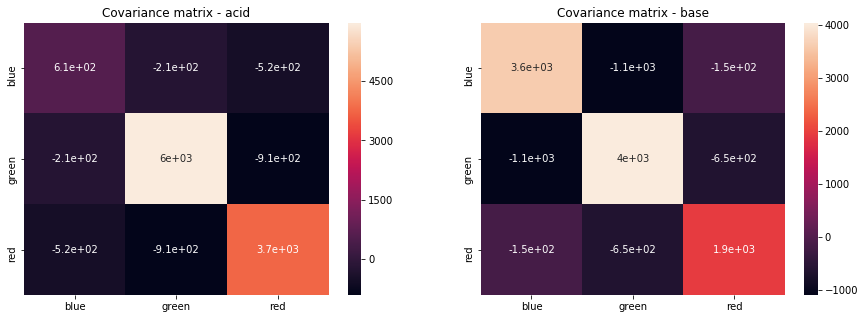

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# for acid
cov_acid = df[df['class'] == 0].drop('class', axis=1).cov()
# for base
cov_base = df[df['class'] == 1].drop('class', axis=1).cov()

fig, axn = plt.subplots(1, 2, figsize=(15,5))
sns.heatmap(cov_acid, 
            xticklabels=cov_acid.columns.values,
            yticklabels=cov_acid.columns.values,annot=True,ax=axn[0])
axn[0].set_title('Covariance matrix - acid')
sns.heatmap(cov_base, 
            xticklabels=cov_base.columns.values,
            yticklabels=cov_base.columns.values,annot=True,ax=axn[1])
axn[1].set_title('Covariance matrix - base')
plt.show()

### Visualization

In [78]:
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


acid = go.Scatter3d(
    x=df[df['class'] == 0]['blue'],
    y=df[df['class'] == 0]['red'],
    z=df[df['class'] == 0]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(255,0,0)',
                  line=dict(width=0)),
    name ='ACID'
)
base = go.Scatter3d(
    x=df[df['class'] == 1]['blue'],
    y=df[df['class'] == 1]['red'],
    z=df[df['class'] == 1]['green'],
    mode='markers',
    marker = dict(size=3,
                  color='rgb(0,0,255)',
                  line=dict(width=0)),
    name ='BASE'
)

acid_mean = go.Scatter3d(
    x = m_acid_df['blue'],
    y = m_acid_df['green'],
    z = m_acid_df['red'],
    mode='markers',
    marker = dict(size=10,
                  color='rgb(255,20,0)',
                  line=dict(width=3)),
    name = "ACID_MEAN"
)

base_mean = go.Scatter3d(
    x = m_base_df['blue'],
    y = m_base_df['green'],
    z = m_base_df['red'],
    mode='markers',
    marker = dict(size=10,
                  color='rgb(0,20,255)',
                  line=dict(width=3)),
    name = "BASE_MEAN"
)

data = [acid, base, acid_mean, base_mean]
layout = go.Layout(
    title='PH-scale',
    scene = dict(
        xaxis = dict(title='blue'),
        yaxis = dict(title='red'),
        zaxis = dict(title='green'),)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='ph-scale')

### W matrix

*** 
W is an intragroup covariance matrix 
$$
    \begin{align}
    \large W = \frac{1}{n-2} \sum_{k=1}^{2} \left(n_k - 1\right) S_k
    \end{align}
$$
$S_k$ is a covariance matrix of each class, $n$ is a sum of every instances. 

**using calculated by hand matrixes**

In [79]:
W = ((n0 - 1) * acid_cov_matrix + (n1 - 1) * base_cov_matrix) / (n - 2)
W

array([[ 20592.19940693,   -681.90260724, -18690.57421518],
       [  -681.90260724,   4931.51934856,   -767.61016281],
       [-18690.57421518,   -767.61016281,  21148.88588225]])

**using *Pandas* matrixes**

In [80]:
W_pd = ((n0 - 1) * cov_acid + (n1 - 1) * cov_base) / (n - 2)
W_pd

,blue,green,red
blue,2219.379879,-681.902607,-317.754688
green,-681.902607,4931.519349,-767.610163
red,-317.754688,-767.610163,2776.066355


### $\hat{a}$ vector and $b$

\begin{align}
\large \hat{a} &= W^{-1} \left(mean_{2} - mean_{1}\right) \\
\large b &= - 0.5 \cdot \hat{a}^T \cdot \left(mean_{2} - mean_{1}\right)
\end{align}


**using calculated by hand matrixes**

In [89]:
hat_a = np.linalg.pinv(W)
hat_a = hat_a.dot(m_acid - m_base)
print(hat_a)

[0.0148925  0.01125488 0.00807351]


In [90]:
b = - 0.5 * hat_a.T
b = b.dot(m_acid - m_base).T
print(b)

-0.8538364484099765


In [91]:
hat_a_pd = pd.DataFrame(np.linalg.pinv(W_pd.values), W_pd.columns, W_pd.index).as_matrix()
hat_a_pd = hat_a_pd.dot(m_acid - m_base)
print(hat_a_pd)

[ 0.06606903  0.01226173 -0.03092038]


In [92]:
b_pd = - 0.5 * hat_a_pd.T
b_pd = b_pd.dot(m_acid - m_base).T
print(b_pd)

-6.929450196150127


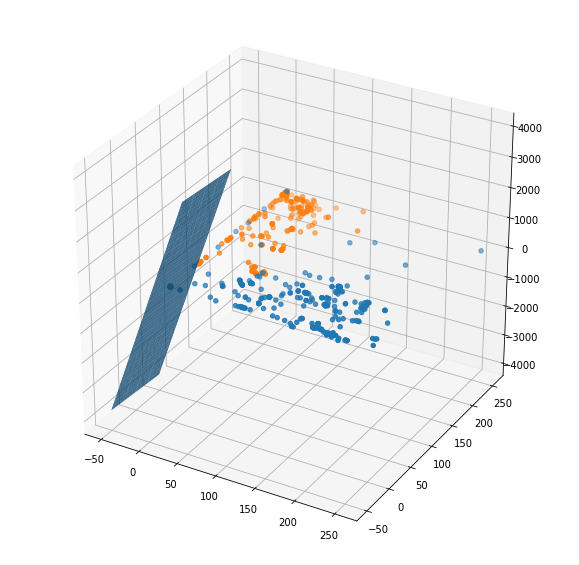

In [88]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

x = np.linspace(-50,50)
y = np.linspace(-50,50)

X,Y = np.meshgrid(x,y)
a_ = -b / hat_a[2]
b_ = -hat_a[0] / hat_a[2]
c_ = -hat_a[1] / hat_a[2]
Z = (-a_*X - b_*Y) / c_

# plot the surface
ax.plot_surface(X, Y, Z)
ax.scatter(df[df['class'] == 1]['blue'],
    df[df['class'] == 1]['red'],
    df[df['class'] == 1]['green'])
ax.scatter(df[df['class'] == 0]['blue'],
    df[df['class'] == 0]['red'],
    df[df['class'] == 0]['green'])
plt.show()

*the surface is supposed to split the data. I have to find a mistake*

In [ ]:
# naive Bayes 
# LDA or QDA 
# random forest + graphs 